<a href="https://colab.research.google.com/github/VaishuCodes/Airbnb-Analysis/blob/main/Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>



## <b> Explore and analyze the data to discover key understandings (not limited to these) such as :
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

1. Neighbourhood groups with highest count among all.
2. Availability of rooms in different areas.
3. Analysis of various rooms type in different areas.
4. Neighbourhood group analysis based on Latitude and Longitude.
5. Price Exploration in neighbourhood group and neighbourhood
6. Price variation based on neighbourhood group and availability_365.
7. Relation between neighbourhood group and Availability of number of days for room.
8. Number of Property owned by each neighbourhood groups.
9. Different rooms distribution based on neighbourhood groups.
10. Correlation among different data sets(columns).
11. Which hosts are the busiest and why?
12. What can we learn from predictions? (ex: locations, prices, reviews, etc)
13. Is there any noticeable difference of traffic among different areas and what could be the reason for it?
14. What can we learn about different hosts and areas?




# Why we need Airbnb Booking analysis ?

Airbnb, is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities.

Airbnb makes money by charging guests and hosts for short-term rental stays in private homes or apartments booked through the Airbnb website.The short-term rental business has seen good growth in the past decade.

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world.  Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.



# Analysis of some queries related to Airbnb Bookings

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import ast

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
file_path='/content/drive/MyDrive/Airbnb NYC 2019.csv'
df=pd.read_csv(file_path)

In [12]:
host_area_data = df.groupby(['host_id', 'neighbourhood_group']).agg(
    num_listings=('id', 'count'),
    avg_price=('price', 'mean'),
    avg_minimum_nights=('minimum_nights', 'mean'),
    avg_availability=('availability_365', 'mean')
).reset_index()

print(host_area_data)

         host_id neighbourhood_group  num_listings   avg_price  \
0           2438            Brooklyn             1   95.000000   
1           2571            Brooklyn             1  182.000000   
2           2787            Brooklyn             6  100.666667   
3           2845           Manhattan             2  162.000000   
4           2868            Brooklyn             1   60.000000   
...          ...                 ...           ...         ...   
37567  274273284           Manhattan             1  140.000000   
37568  274298453            Brooklyn             1   54.000000   
37569  274307600            Brooklyn             1  190.000000   
37570  274311461           Manhattan             1  200.000000   
37571  274321313           Manhattan             1  125.000000   

       avg_minimum_nights  avg_availability  
0                    45.0          0.000000  
1                     9.0         23.000000  
2                     1.0        235.333333  
3                     1

In [16]:
neighbourhood_counts = df['neighbourhood_group'].value_counts()
print(neighbourhood_counts.idxmax(), neighbourhood_counts.max())

Manhattan 21661


In [17]:
area_availability = df.groupby('neighbourhood_group')['availability_365'].mean().sort_values(ascending=False)
print(area_availability)

neighbourhood_group
Staten Island    199.678284
Bronx            165.758937
Queens           144.451818
Manhattan        111.979410
Brooklyn         100.232292
Name: availability_365, dtype: float64


In [18]:
room_type_by_area = df.groupby(['neighbourhood_group', 'room_type'])['id'].count().unstack()
print(room_type_by_area)

room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                            379           652           60
Brooklyn                        9559         10132          413
Manhattan                      13199          7982          480
Queens                          2096          3372          198
Staten Island                    176           188            9


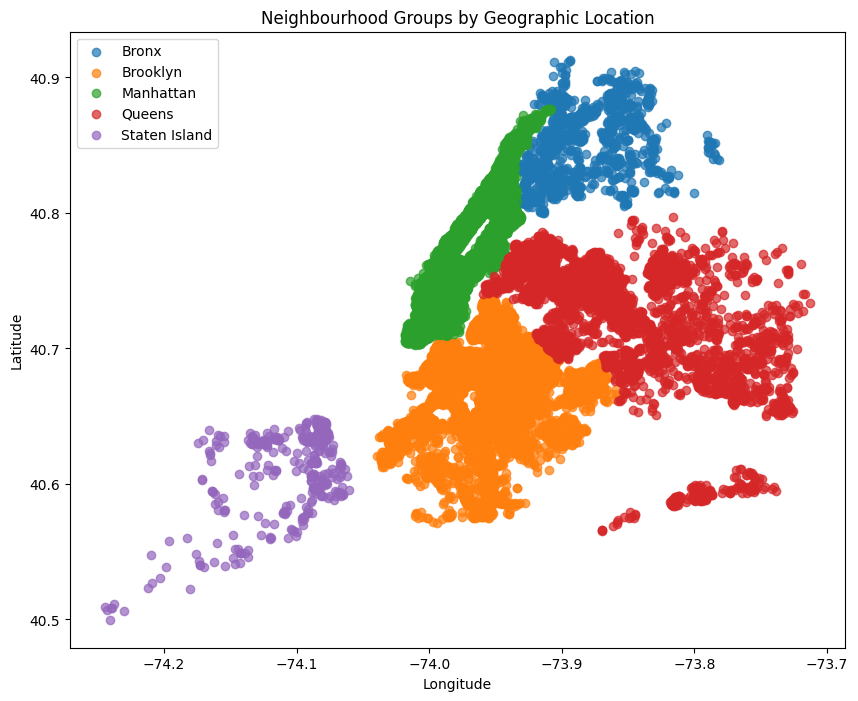

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
for group, data in df.groupby('neighbourhood_group'):
    plt.scatter(data['longitude'], data['latitude'], label=group, alpha=0.7)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Neighbourhood Groups by Geographic Location')
plt.legend()
plt.show()


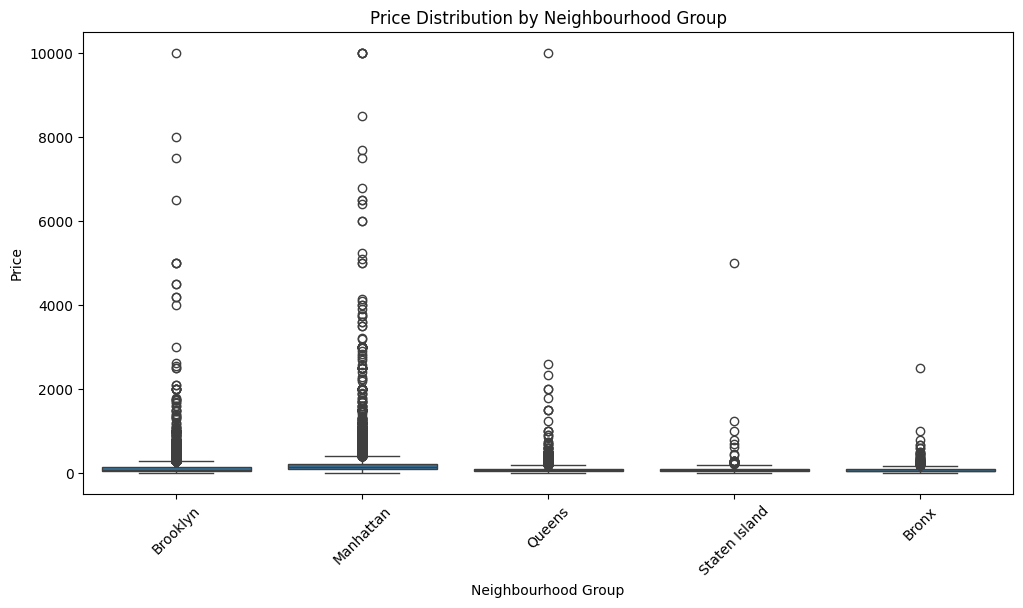

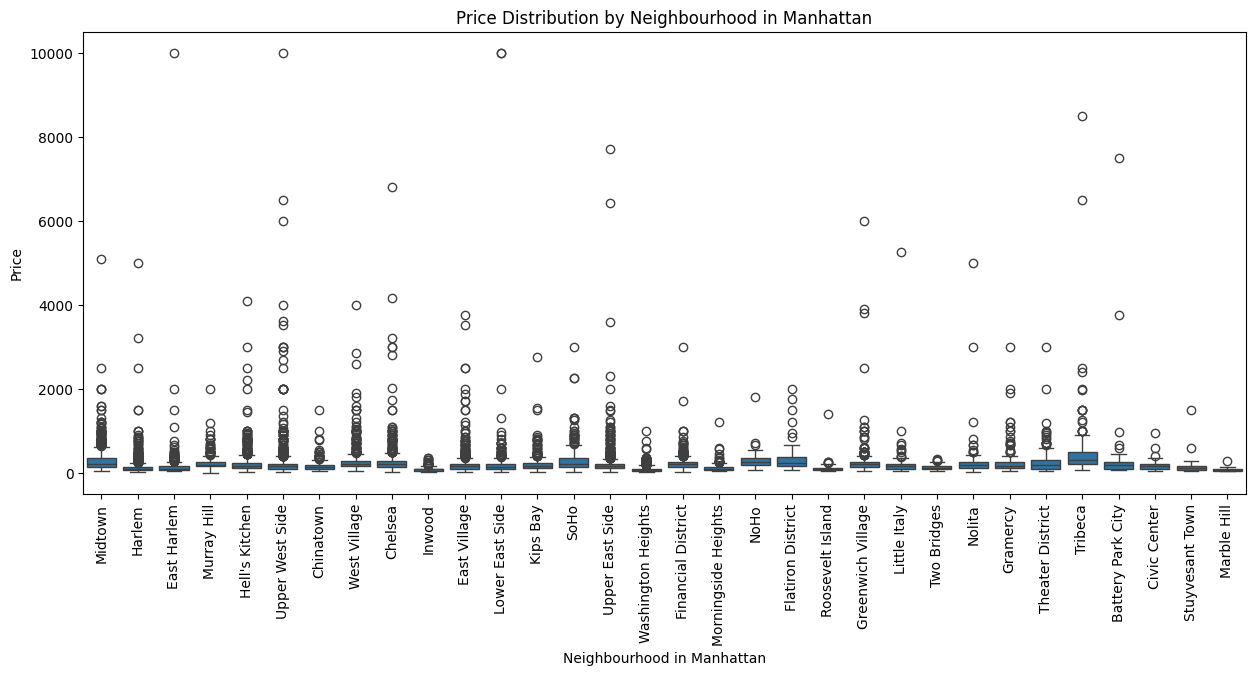

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.title('Price Distribution by Neighbourhood Group')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(15, 6))
sns.boxplot(x='neighbourhood', y='price', data=df[df['neighbourhood_group'] == 'Manhattan'])
plt.xlabel('Neighbourhood in Manhattan')
plt.ylabel('Price')
plt.title('Price Distribution by Neighbourhood in Manhattan')
plt.xticks(rotation=90)
plt.show()


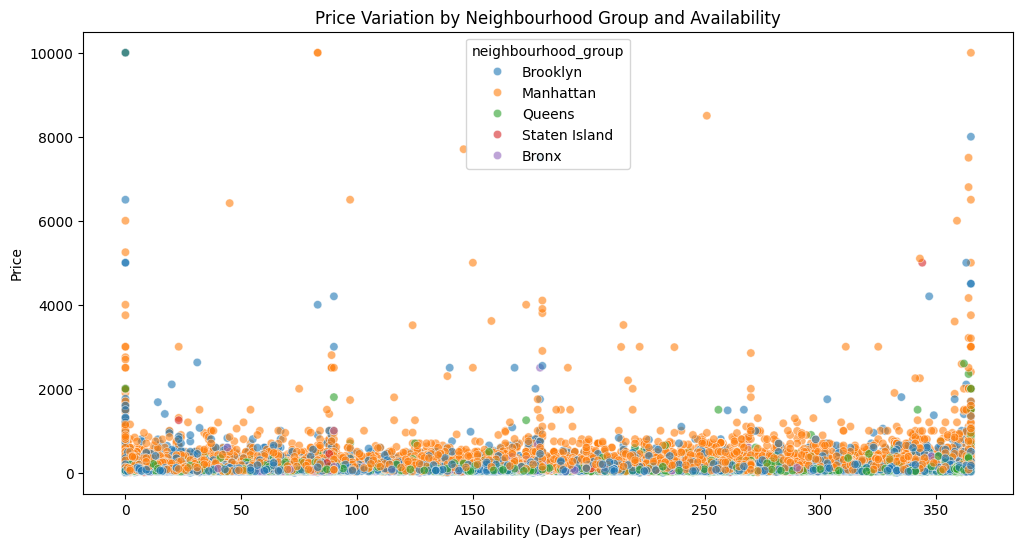

In [24]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='availability_365', y='price', hue='neighbourhood_group', data=df, alpha=0.6)
plt.xlabel('Availability (Days per Year)')
plt.ylabel('Price')
plt.title('Price Variation by Neighbourhood Group and Availability')
plt.show()


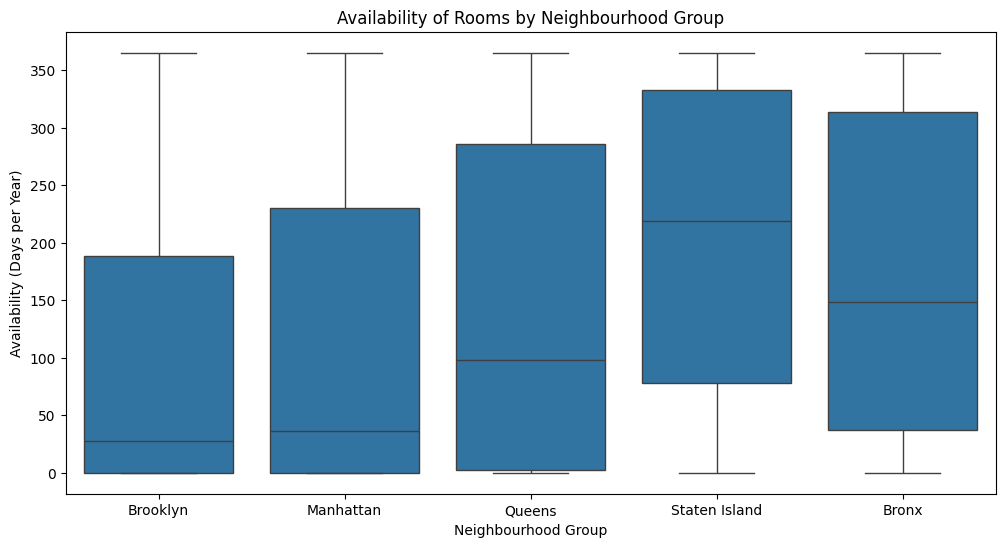

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group', y='availability_365', data=df)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Availability (Days per Year)')
plt.title('Availability of Rooms by Neighbourhood Group')
plt.show()


In [26]:
property_counts = df.groupby('neighbourhood_group')['id'].count()
print(property_counts)


neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: id, dtype: int64


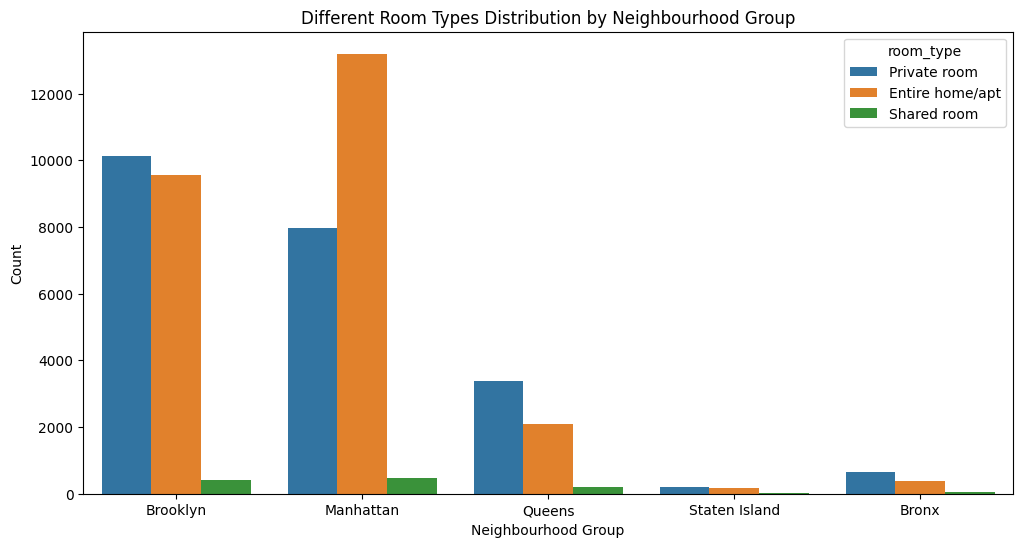

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(x='neighbourhood_group', hue='room_type', data=df)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.title('Different Room Types Distribution by Neighbourhood Group')
plt.show()


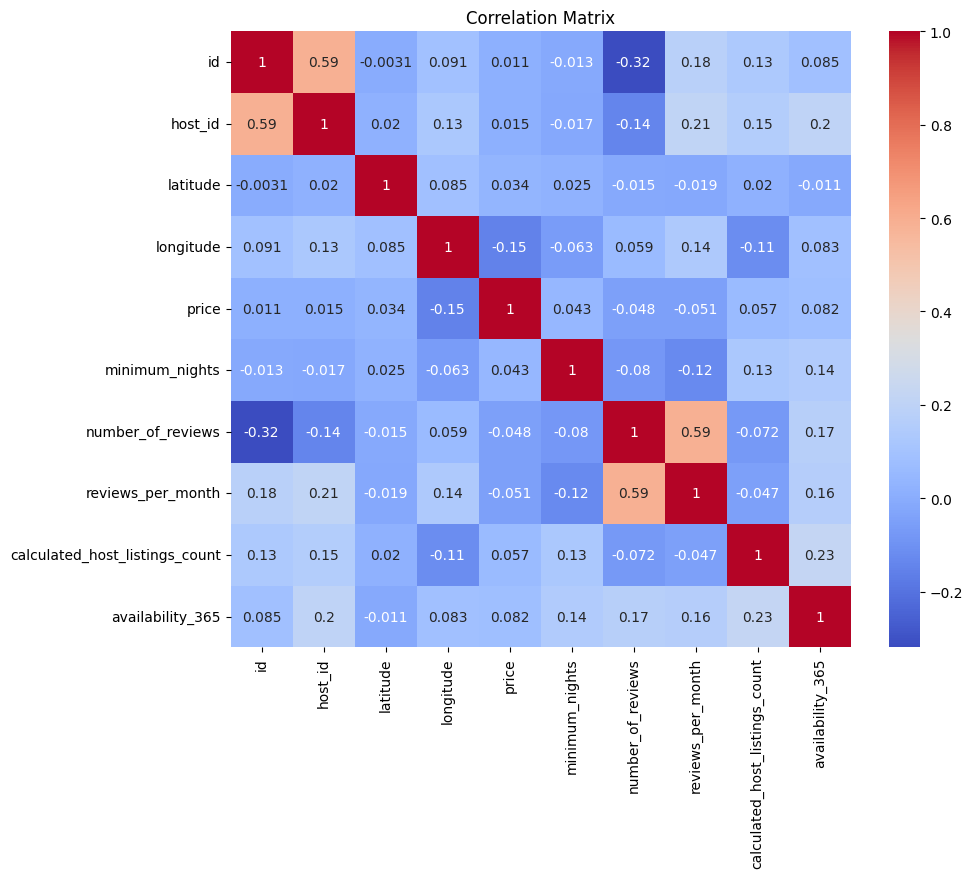

In [30]:
numerical_columns = df.select_dtypes(include=['float', 'int']).columns

correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [31]:
host_reviews = df.groupby('host_id')['number_of_reviews'].sum().sort_values(ascending=False)

top_busy_hosts = host_reviews.head(10)
print(top_busy_hosts)

busiest_hosts_data = df[df['host_id'].isin(top_busy_hosts.index)]
print(busiest_hosts_data[['host_id', 'neighbourhood_group', 'room_type', 'price', 'minimum_nights', 'availability_365', 'number_of_reviews']].describe())


host_id
37312959     2273
344035       2205
26432133     2017
35524316     1971
40176101     1818
4734398      1798
16677326     1355
6885157      1346
219517861    1281
23591164     1269
Name: number_of_reviews, dtype: int64
            host_id       price  minimum_nights  availability_365  \
count  4.020000e+02  402.000000      402.000000        402.000000   
mean   1.820635e+08  221.567164       11.014925        293.497512   
std    7.855218e+07  128.494725       12.952812         77.962561   
min    3.440350e+05   32.000000        1.000000          0.000000   
25%    2.195179e+08  155.000000        2.000000        273.000000   
50%    2.195179e+08  214.000000        2.000000        326.000000   
75%    2.195179e+08  245.000000       29.000000        341.000000   
max    2.195179e+08  699.000000       29.000000        365.000000   

       number_of_reviews  
count         402.000000  
mean           43.116915  
std           105.107966  
min             0.000000  
25%             0

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features = ['minimum_nights', 'number_of_reviews', 'availability_365']
X = df[features]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

new_listing_features = pd.DataFrame([[2, 10, 100]], columns=features)  # Example values

predicted_price = model.predict(new_listing_features)
print(predicted_price)


[154.64258493]


neighbourhood_group
Staten Island    30.941019
Queens           27.700318
Bronx            26.004583
Brooklyn         24.202845
Manhattan        20.985596
Name: number_of_reviews, dtype: float64


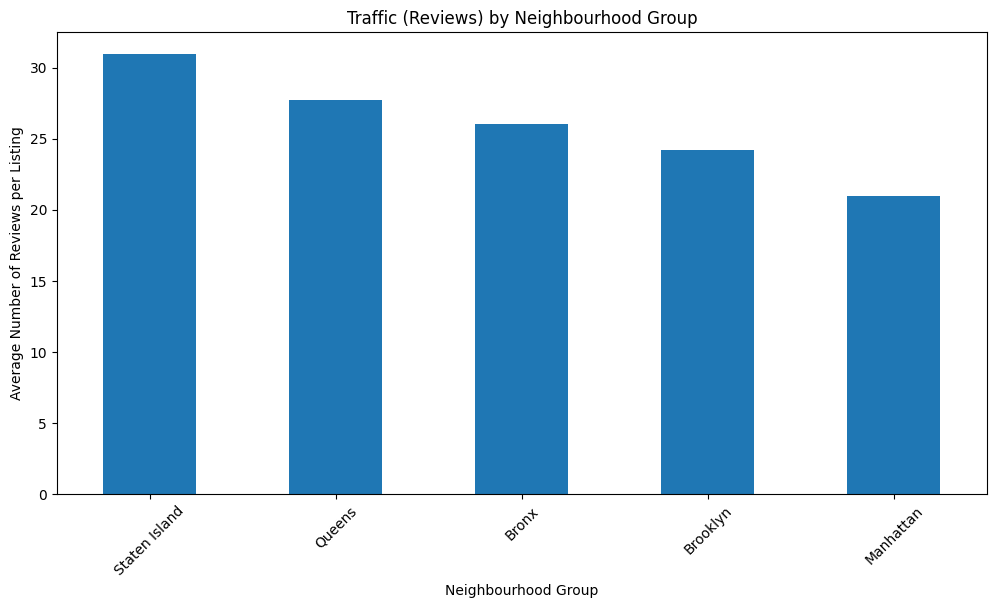


Potential reasons for differences in traffic:
- Manhattan likely has higher traffic due to its popularity with tourists and central location.
- Brooklyn might be attracting more visitors interested in a more local, less touristy experience.
- Staten Island and Bronx could have lower traffic due to being less well-known or less accessible by public transport.
- Availability of attractions, safety, and overall neighborhood appeal could also play significant roles.


In [36]:
traffic_by_area = df.groupby('neighbourhood_group')['number_of_reviews'].mean().sort_values(ascending=False)
print(traffic_by_area)

plt.figure(figsize=(12, 6))
traffic_by_area.plot(kind='bar')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Number of Reviews per Listing')
plt.title('Traffic (Reviews) by Neighbourhood Group')
plt.xticks(rotation=45)
plt.show()

print("\nPotential reasons for differences in traffic:")
print("- Manhattan likely has higher traffic due to its popularity with tourists and central location.")
print("- Brooklyn might be attracting more visitors interested in a more local, less touristy experience.")
print("- Staten Island and Bronx could have lower traffic due to being less well-known or less accessible by public transport.")
print("- Availability of attractions, safety, and overall neighborhood appeal could also play significant roles.")


In [37]:
host_area_data = df.groupby(['host_id', 'neighbourhood_group']).agg(
    num_listings=('id', 'count'),
    avg_price=('price', 'mean'),
    avg_minimum_nights=('minimum_nights', 'mean'),
    avg_availability=('availability_365', 'mean')
).reset_index()

print(host_area_data)

host_reviews = df.groupby('host_id')['number_of_reviews'].sum().sort_values(ascending=False)
top_busy_hosts = host_reviews.head(10)
print("\nTop 10 busiest hosts based on number of reviews:")
print(top_busy_hosts)

busiest_hosts_data = df[df['host_id'].isin(top_busy_hosts.index)]
print("\nCharacteristics of listings by the busiest hosts:")
print(busiest_hosts_data[['host_id', 'neighbourhood_group', 'room_type', 'price',
                           'minimum_nights', 'availability_365', 'number_of_reviews']].describe())

traffic_by_area = df.groupby('neighbourhood_group')['number_of_reviews'].mean().sort_values(ascending=False)
print("\nAverage number of reviews per listing by neighbourhood group:")
print(traffic_by_area)

print("\nPotential reasons for differences in traffic:")
print("- Manhattan likely has higher traffic due to its popularity with tourists and central location.")
print("- Brooklyn might be attracting more visitors interested in a more local, less touristy experience.")
print("- Staten Island and Bronx could have lower traffic due to being less well-known or less accessible by public transport.")
print("- Availability of attractions, safety, and overall neighborhood appeal could also play significant roles.")


         host_id neighbourhood_group  num_listings   avg_price  \
0           2438            Brooklyn             1   95.000000   
1           2571            Brooklyn             1  182.000000   
2           2787            Brooklyn             6  100.666667   
3           2845           Manhattan             2  162.000000   
4           2868            Brooklyn             1   60.000000   
...          ...                 ...           ...         ...   
37567  274273284           Manhattan             1  140.000000   
37568  274298453            Brooklyn             1   54.000000   
37569  274307600            Brooklyn             1  190.000000   
37570  274311461           Manhattan             1  200.000000   
37571  274321313           Manhattan             1  125.000000   

       avg_minimum_nights  avg_availability  
0                    45.0          0.000000  
1                     9.0         23.000000  
2                     1.0        235.333333  
3                     1